<h1 style= "text-align : center;border: 1px solid purple; border-radius : 20px; padding :20px; ">Iris flower classification</h1>

# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings('ignore')

In [2]:
print('Pandas version: ',pd.__version__)
print('NumPy version: ',np.__version__)
print("Seaborn version:", sns.__version__)
print("Matplotlib version: ", plt.matplotlib.__version__)


Pandas version:  2.0.3
NumPy version:  1.24.3
Seaborn version: 0.12.2
Matplotlib version:  3.7.2


# Projects Settings

In [3]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
palettes = ['viridis', 'magma', 'plasma', 'inferno', 'twilight', 'twilight_shifted', 'cool', 'coolwarm', 'cividis', 'spring',
            'summer', 'autumn', 'winter', 'bone', 'copper', 'pink', 'spring_r', 'summer_r', 'autumn_r', 'winter_r',
            'PuBu', 'PuBuGn', 'BuPu', 'RdPu', 'PuRd', 'Oranges', 'YlOrBr', 'YlOrRd', 'OrRd', 'RdOrYl', 'YlGn', 'YlGnBu',
            'GnBu', 'BuGn', 'PuOr', 'BrBG', 'PRGn', 'PiYG', 'RdGy', 'RdBu', 'RdYlBu', 'RdYlGn', 'Spectral', 'cubehelix',
            'husl', 'husl_r', 'hls', 'hls_r', 'gist_ncar', 'gist_ncar_r']
colors = ['#003049', '#D62828', '#F77F00', '#FCBF49', '#EAE2B7']

# Exploring the dataset

## Loading the data

In [4]:
iris = pd.read_csv('IRIS.csv')

In [5]:
iris.sample()

,sepal_length,sepal_width,petal_length,petal_width,species
104,6.5,3.0,5.8,2.2,Iris-virginica


## Understanding the data

In [6]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


we notice that our dataset consist of 4 features for the flower, and one column to determine the speacie or category of the flower.

So that means we have labelled dataset on which we can use classification models.

In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


The `info()` method of a Pandas DataFrame tells us that the DataFrame has:

* **150 rows:** This is the number of data points in your dataset.
* **5 columns:** These columns likely represent features of your data.
* **Data types:**
    * The first four columns (sepal_length, sepal_width, petal_length, petal_width) are of type `float64`, which means they contain numerical data.
    * The fifth column (species) is of type `object`, which means it contains categorical data (likely text labels).

Overall, this output suggests we're working with a dataset of 150 samples, each described by four numerical features and a categorical label. 

In [8]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


1. **Sepal Length:** The Iris flowers in this dataset have an average sepal length of 5.84 cm. There's a decent spread in the data though, with a standard deviation of 0.83 cm. The smallest sepal measured 4.3 cm and the largest was 7.9 cm.

2. **Sepal Width:** The average sepal width is slightly less than the length at 3.05 cm. Similar to the length, there's some variation with a standard deviation of 0.43 cm. Sepal widths range between 2.0 cm and 4.4 cm.

3. **Petal Length:** Petal length shows a greater range compared to the sepals. The average petal is 3.76 cm long, but the standard deviation is 1.76 cm. The shortest petal measured 1.0 cm and the longest was 6.9 cm.

4. **Petal Width:** The average petal width is the smallest at 1.20 cm. The data also has the highest standard deviation here at 0.76 cm. Petal widths range from a mere 0.1 cm to 2.5 cm.

## Cleaning the dataset

In [9]:
iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

    No missing values!

In [10]:
iris.duplicated().sum()

3

    Three rows are duplicated, we may need to drop those duplicated rows

In [11]:
iris.drop_duplicates(inplace = True)

In [12]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Now our dataset is reading for more exloratary data analysis, visualisation and classification

# Visualisation


## Distribution of iris species

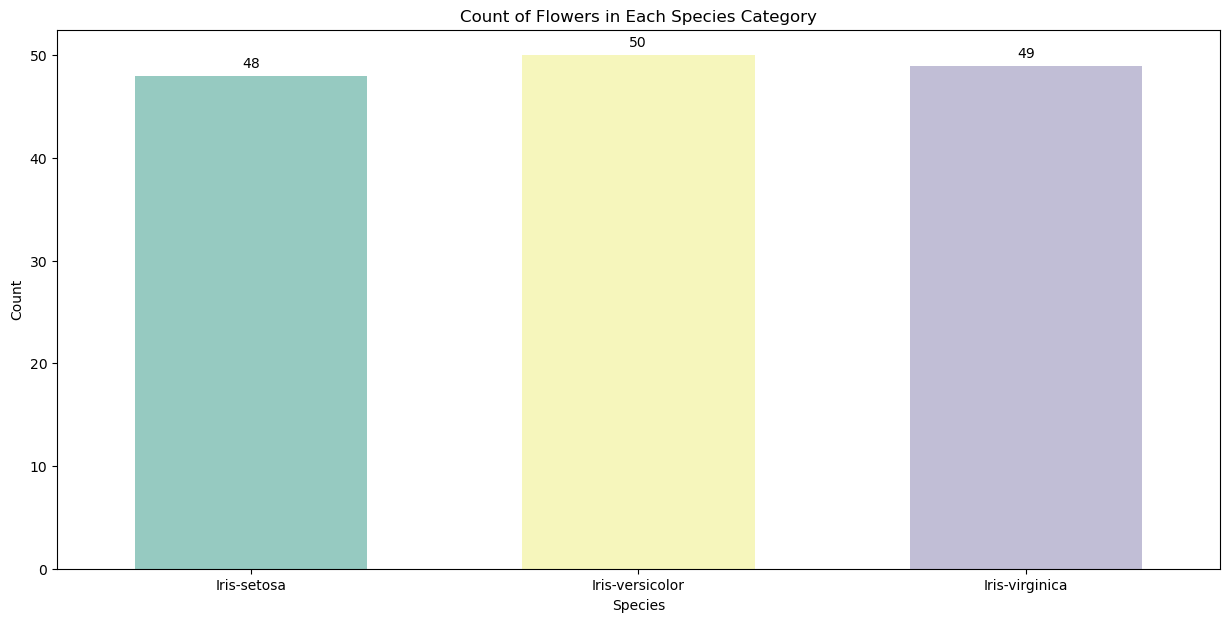

In [13]:
plt.figure(figsize=(15, 7))

# Plot the count of flowers in each category of species
ax = sns.countplot(data=iris, x='species', palette='Set3', width=0.6)

# Annotate each bar with its count value
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.title('Count of Flowers in Each Species Category')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()


## Measured lengths and withds by the species

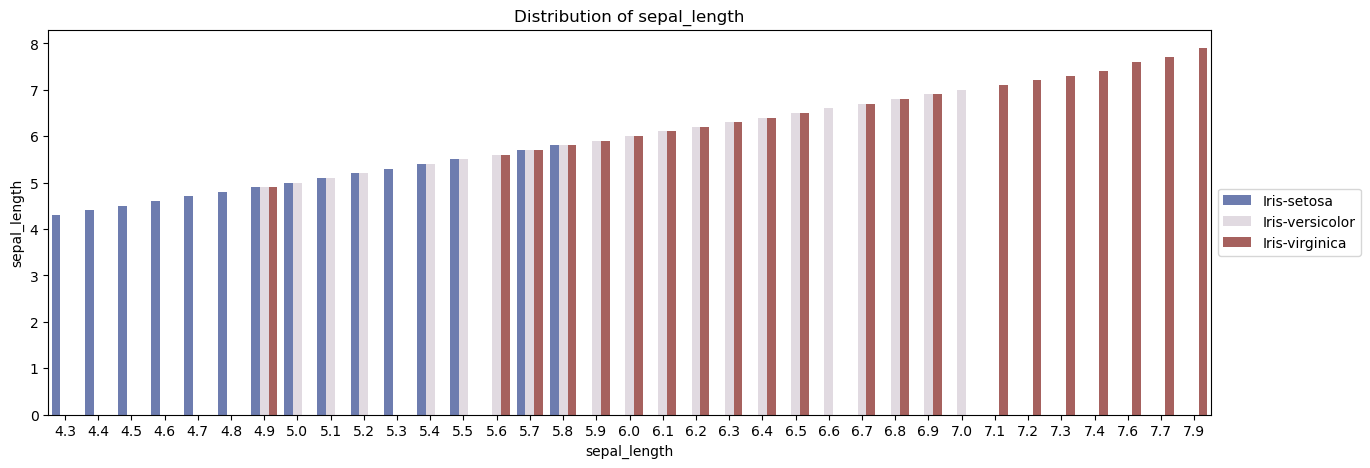

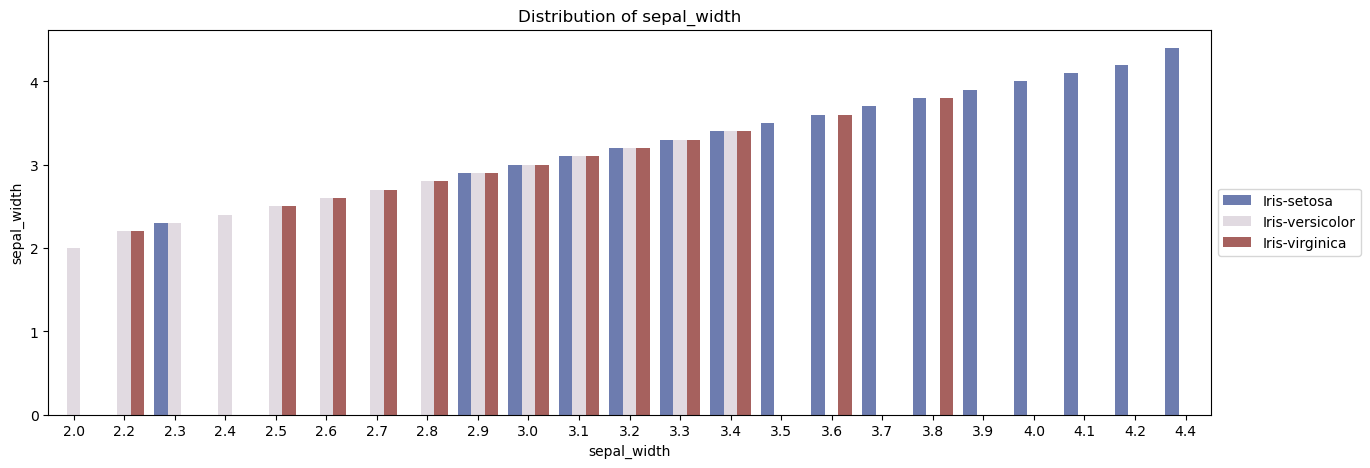

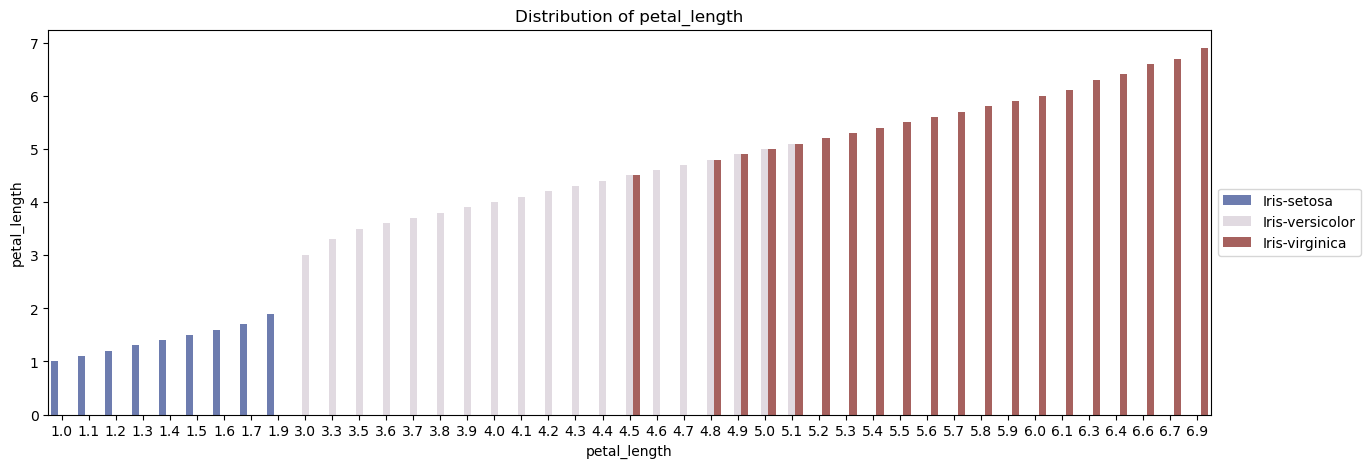

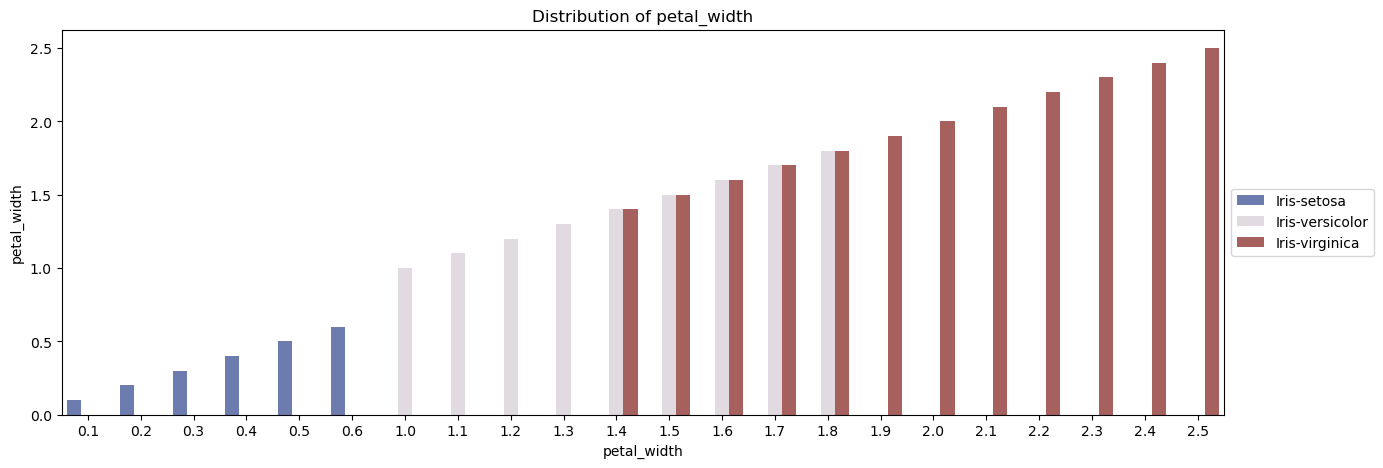

In [14]:
columns = iris.columns

for col in columns:
    if col == 'species':
        continue
    plt.figure(figsize=(15, 5))
    sns.barplot(data=iris, x=col, y=iris[col], palette=palettes[5], hue='species')
    plt.title(f'Distribution of {col}')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

From the following graphes, we notice some intrestenting informations:
- The setosa specie is caracterised with a small sepal_length, medium to high sepad_width, very low petal width and length
- The versicolor specie is caraterised by a variation in the sepal_length, where the typically are concentrated are a medium length, same for the petal width. Concerning the petal, this specie mainly obtain a medium length and width, with some having more than average
- The virginica specie is identifiable with it's medium to significantly high setal_length, with a lot of variation when it comes to the sepal_width. On the other hand, the petal length and width for this specie is siginifcantly higher than all the other species, with some precence in the medium range

## Regression plot

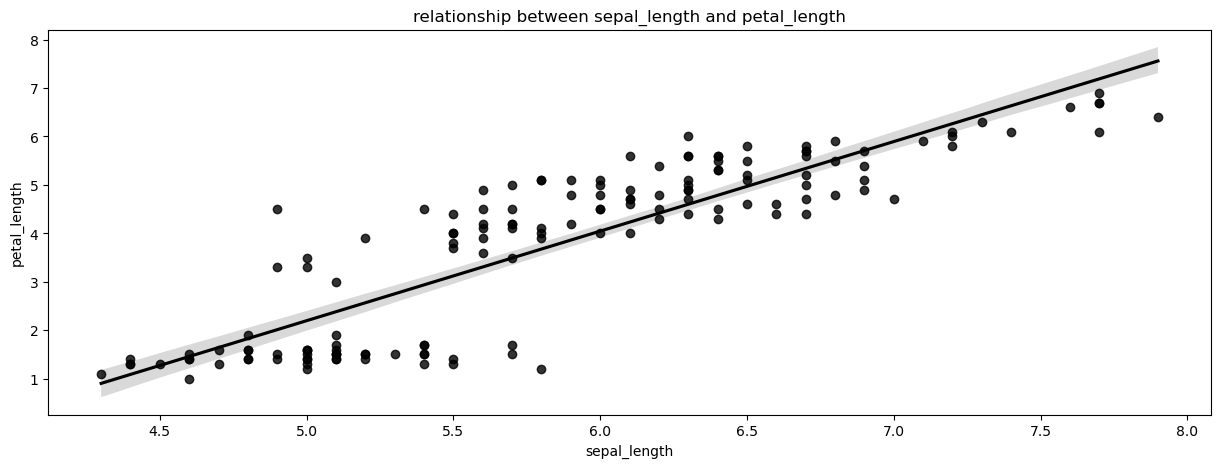

In [80]:
plt.figure(figsize = (15,5))
sns.regplot(data = iris, x = 'sepal_length', y = 'petal_length', scatter = True, color = 'black')
plt.title('relationship between sepal_length and petal_length')
plt.show()

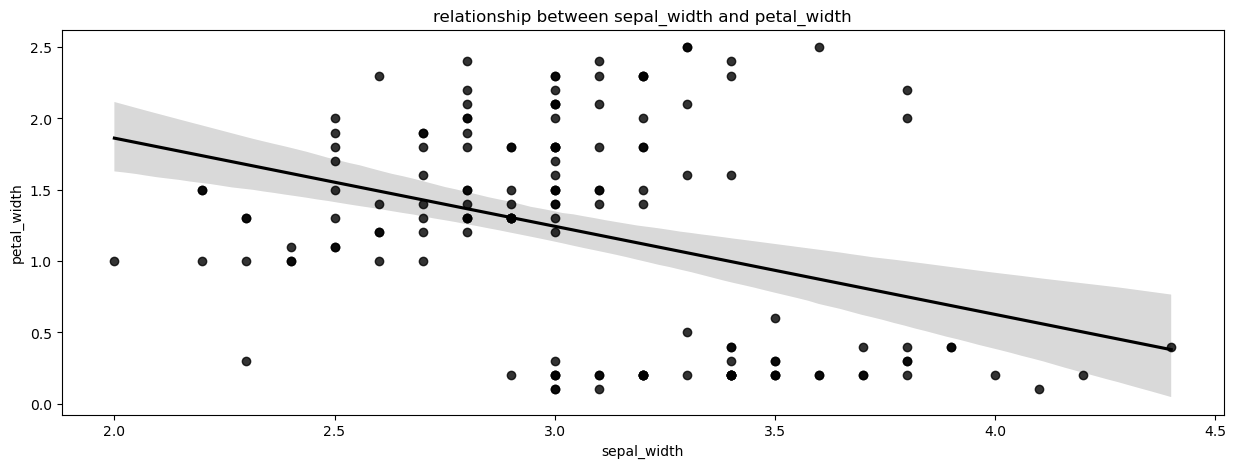

In [81]:
plt.figure(figsize = (15,5))
sns.regplot(data = iris, x = 'sepal_width', y = 'petal_width', scatter = True, color = 'black')
plt.title('relationship between sepal_width and petal_width')
plt.show()

<Figure size 1500x500 with 0 Axes>

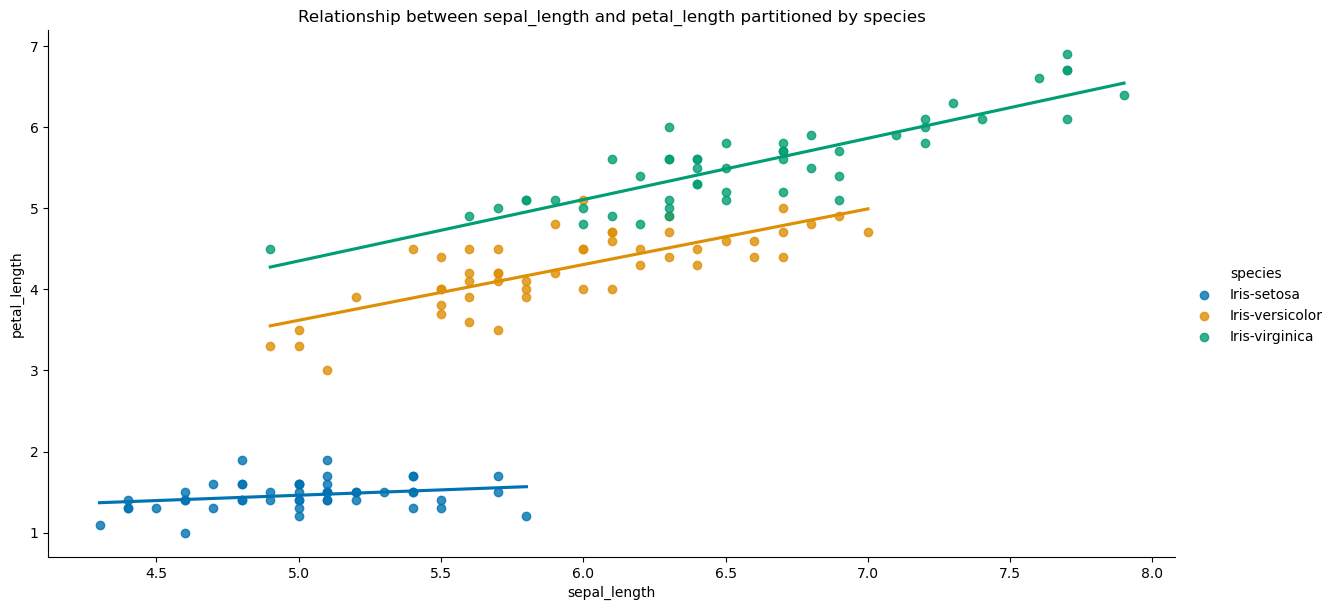

In [83]:
plt.figure(figsize=(15, 5))
sns.lmplot(data=iris, x='sepal_length', y='petal_length', hue='species', scatter=True, ci=None, palette='colorblind', height=6, aspect=2)
plt.title('Relationship between sepal_length and petal_length partitioned by species')
plt.show()


<Figure size 1500x500 with 0 Axes>

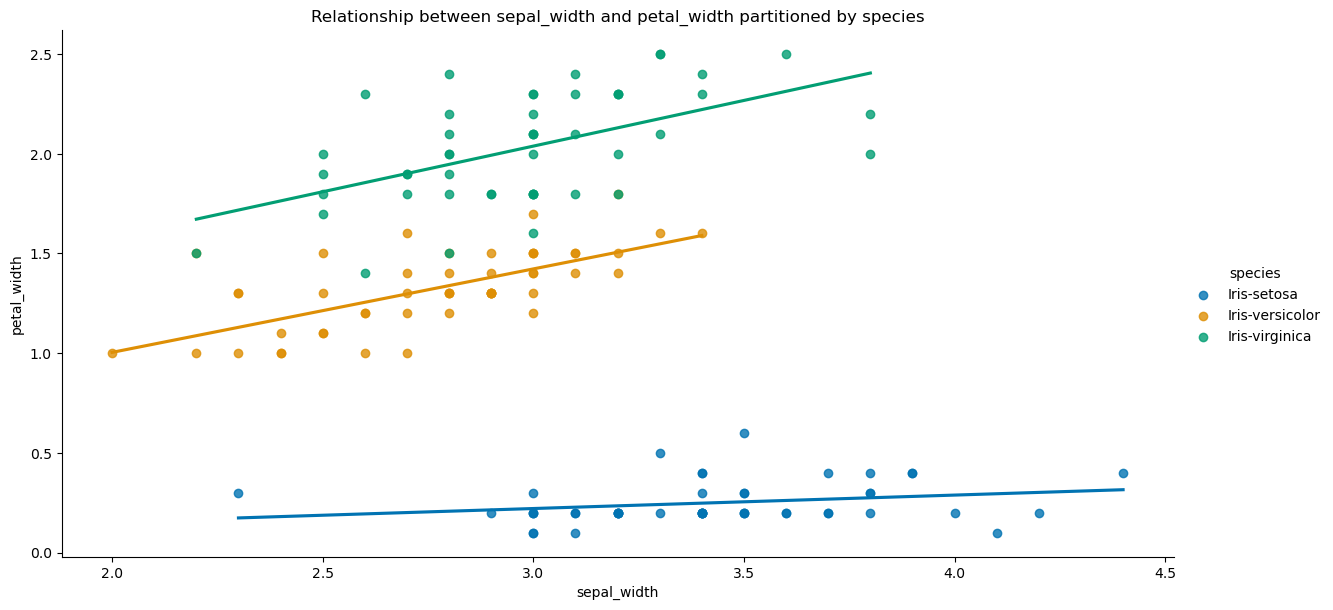

In [84]:
plt.figure(figsize=(15, 5))
sns.lmplot(data=iris, x='sepal_width', y='petal_width', hue='species', scatter=True, ci=None, palette='colorblind', height=6, aspect=2)
plt.title('Relationship between sepal_width and petal_width partitioned by species')
plt.show()


## Pairplot

<Figure size 1600x1600 with 0 Axes>

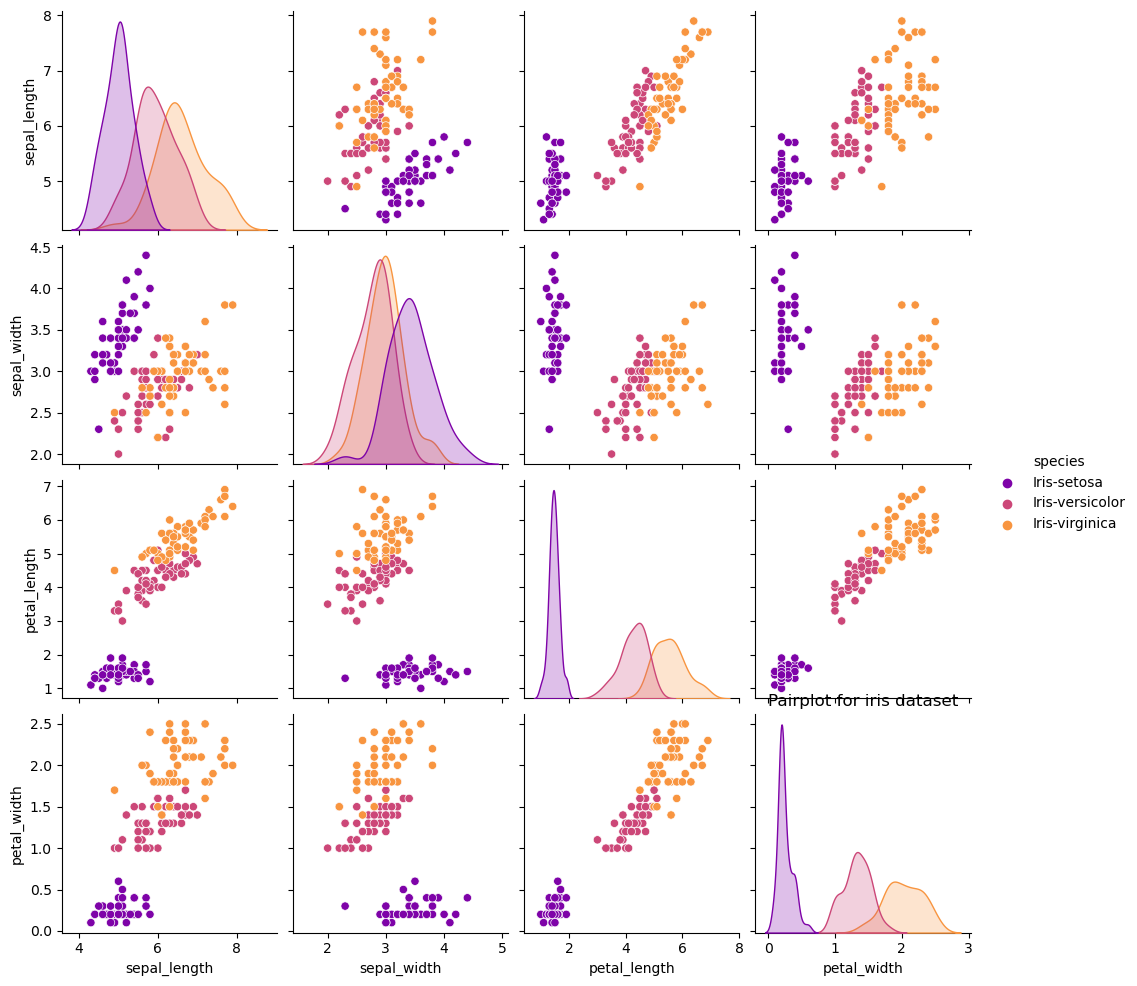

In [15]:

plt.figure(figsize = (16,16))
sns.pairplot(data = iris, hue = 'species', palette = palettes[2])
plt.title('Pairplot for iris dataset')
plt.show()

# Data cleaning

In [16]:
iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [17]:
iris.duplicated().sum()

0

In [18]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  147 non-null    float64
 1   sepal_width   147 non-null    float64
 2   petal_length  147 non-null    float64
 3   petal_width   147 non-null    float64
 4   species       147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


Since we have no missing values and no duplicated one either, we dont need to perform any additional data cleaning process. Also, we have no bad formatted entries as every piece of data is either float or a string values

# Data Preprocessing

Here we can concetrate on different aspect like feature enginnering, normalisation and standerisation and many more

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

## Encoding data

In order for our model to properly handle our dataset, we must encode our dataset, meaning we must transform those strings values into numerical values, thus called encoding 

In [20]:
label_encoder = LabelEncoder()

In [21]:
iris['species_encoded'] = label_encoder.fit_transform(iris['species'])

In [22]:
label_encoder.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

The function `label_encoder` transformed our species column into a new column encoded with values ranging from 0 to 2, <br>representing in order the following array of species ['Iris-setosa' : 0, 'Iris-versicolor' : 1, 'Iris-virginica' : 2]

## Splitting the data

we need to split the data into 2 sub-dataset, one that contains only our target feature, and the other containing the other features with the target feature excluded

In [23]:
X = iris.drop(['species_encoded', 'species'], inplace = False, axis = 1)
Y = iris['species_encoded']


In [24]:
stdscaler = StandardScaler()
minmaxscaler = MinMaxScaler()

X_minmax = minmaxscaler.fit_transform(X)
X_data = pd.DataFrame(X_minmax,columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

In [25]:
X_data.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146
sepal_length,0.222222,0.166667,0.111111,0.083333,0.194444,0.305556,0.083333,0.194444,0.027778,0.166667,0.305556,0.138889,0.138889,0.000000,0.416667,0.388889,0.305556,0.222222,0.388889,0.222222,0.305556,0.222222,0.083333,0.222222,0.138889,0.194444,0.194444,0.250000,0.250000,0.111111,0.138889,0.305556,0.250000,0.333333,0.194444,0.333333,0.027778,0.222222,0.194444,0.055556,0.027778,0.194444,0.222222,0.138889,0.222222,0.083333,0.277778,0.194444,0.750000,0.583333,...,0.388889,0.555556,0.416667,0.777778,0.555556,0.611111,0.916667,0.166667,0.833333,0.666667,0.805556,0.611111,0.583333,0.694444,0.388889,0.416667,0.583333,0.611111,0.944444,0.944444,0.472222,0.722222,0.361111,0.944444,0.555556,0.666667,0.805556,0.527778,0.500000,0.583333,0.805556,0.861111,1.000000,0.583333,0.555556,0.500000,0.944444,0.555556,0.583333,0.472222,0.722222,0.666667,0.722222,0.694444,0.666667,0.666667,0.555556,0.611111,0.527778,0.444444
sepal_width,0.625000,0.416667,0.500000,0.458333,0.666667,0.791667,0.583333,0.583333,0.375000,0.458333,0.708333,0.583333,0.416667,0.416667,0.833333,1.000000,0.791667,0.625000,0.750000,0.750000,0.583333,0.708333,0.666667,0.541667,0.583333,0.416667,0.583333,0.625000,0.583333,0.500000,0.458333,0.583333,0.875000,0.916667,0.500000,0.625000,0.416667,0.583333,0.625000,0.125000,0.500000,0.625000,0.750000,0.416667,0.750000,0.500000,0.708333,0.541667,0.500000,0.500000,...,0.333333,0.541667,0.291667,0.416667,0.375000,0.416667,0.416667,0.208333,0.375000,0.208333,0.666667,0.500000,0.291667,0.416667,0.208333,0.333333,0.500000,0.416667,0.750000,0.250000,0.083333,0.500000,0.333333,0.333333,0.291667,0.541667,0.500000,0.333333,0.416667,0.333333,0.416667,0.333333,0.750000,0.333333,0.333333,0.250000,0.416667,0.583333,0.458333,0.416667,0.458333,0.458333,0.458333,0.500000,0.541667,0.416667,0.208333,0.416667,0.583333,0.416667
petal_length,0.067797,0.067797,0.050847,0.084746,0.067797,0.118644,0.067797,0.084746,0.067797,0.084746,0.084746,0.101695,0.067797,0.016949,0.033898,0.084746,0.050847,0.067797,0.118644,0.084746,0.118644,0.084746,0.000000,0.118644,0.152542,0.101695,0.101695,0.084746,0.067797,0.101695,0.101695,0.084746,0.084746,0.067797,0.033898,0.050847,0.050847,0.084746,0.050847,0.050847,0.050847,0.101695,0.152542,0.067797,0.101695,0.067797,0.084746,0.067797,0.627119,0.593220,...,0.525424,0.847458,0.694915,0.830508,0.779661,0.813559,0.949153,0.593220,0.898305,0.813559,0.864407,0.694915,0.728814,0.762712,0.677966,0.694915,0.728814,0.762712,0.966102,1.000000,0.677966,0.796610,0.661017,0.966102,0.661017,0.796610,0.847458,0.644068,0.661017,0.779661,0.813559,0.864407,0.915254,0.779661,0.694915,0.779661,0.864407,0.779661,0.762712,0.644068,0.745763,0.779661,0.694915,0.830508,0.796610,0.711864,0.677966,0.711864,0.745763,0.694915
petal_width,0.041667,0.041667,0.041667,0.041667,0.041667,0.125000,0.083333,0.041667,0.041667,0.000000,0.041667,0.041667,0.000000,0.000000,0.041667,0.125000,0.125000,0.083333,0.083333,0.083333,0.041667,0.125000,0.041667,0.166667,0.041667,0.041667,0.125000,0.041667,0.041667,0.041667,0.041667,0.125000,0.000000,0.041667,0.041667,0.041667,0.041667,0.041667,0.083333,0.083333,0.041667,0.208333,0.125000,0.083333,0.041667,0.041667,0.041667,0.041667,0.541667,0.583333,...,0.500000,1.000000,0.750000,0.833333,0.708333,0.875000,0.833333,0.666667,0.708333,0.708333,1.000000,0.791667,0.750000,0.833333,0.791667,0.958333,0.916667,0.708333,0.875000,0.916667,0.583333,0.916667,0.791667,0.791667,0.708333,0.833333,0.708333,0.708333,0.708333,0.833333,0.625000,0.750000,0.791667,0.875000,0.583333,0.541667,0.916667,0.958333,0.708333,0.708333,0.833333,0.958333,0.916667,0.916667,1.000000,0.916667,0.750000,0.791667,0.916667,0

In [26]:
X_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,0.432351,0.439909,0.471233,0.462018
std,0.230306,0.182087,0.298154,0.315781
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.576271,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [27]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species_encoded, Length: 147, dtype: int64

Now that we seperated our data into target and base feature, we may continue into defining the training and testing datasets

In [28]:
X_train,X_test,Y_train,Y_test = train_test_split(X_data,Y, test_size=0.2, random_state=1, shuffle=True)

# Classification models

In [29]:
from sklearn.metrics import r2_score, roc_auc_score, roc_curve, precision_score, accuracy_score, confusion_matrix, classification_report, auc
from sklearn.model_selection import GridSearchCV

## K-Nearest Neighbors (KNN) for Classification

In [30]:
from sklearn.neighbors import KNeighborsClassifier

K-Nearest Neighbors (KNN) is a simple and versatile supervised machine learning algorithm for classification tasks. It classifies data points based on the similarity to their nearest neighbors in the feature space. Here's a breakdown of how it works:

**1. Training:**

* The KNN algorithm doesn't explicitly learn a model from the training data. Instead, it stores all the training data points.

**2. Classification:**

* When a new data point (unknown class) arrives, KNN calculates the distance between the new point and all the data points in the training set using a distance metric like Euclidean distance.
* The algorithm then identifies the **k** nearest neighbors (most similar data points) to the new point based on the calculated distances.
* KNN assigns the class label that is most frequent among these k nearest neighbors to the new data point.

**Key aspects of KNN:**

* **k**: This is a user-defined parameter that determines the number of nearest neighbors to consider during classification. Choosing the optimal k value is crucial for KNN's performance.
* **Distance Metric**: This metric defines how to measure the similarity between data points. Euclidean distance is a common choice, but other options exist depending on the data.

**Advantages of KNN:**

* **Simple and easy to understand:** KNN is a conceptually straightforward algorithm, making it easy to implement and interpret.
* **Effective for various data types:** KNN can work with various data types, including numerical and categorical data.
* **No training needed in the traditional sense:** Since KNN stores the training data, it doesn't require complex model fitting procedures.

**Disadvantages of KNN:**

* **High memory usage:** Storing all the training data can be memory-intensive for large datasets.
* **Sensitive to k**: Choosing the optimal k value can significantly impact performance. Experimentation is often needed.
* **Computationally expensive for classification:** Classifying new data points involves calculating distances to all training points, which can be slow for large datasets.

### a. Hyperparametres

The first step in setting up a model, whether for classification, clustering or anything else, is to choose the optimal hyperparameters


In [31]:
neighbors = np.arange(1,11)

train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [32]:
for index, i in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    train_accuracy[index] = knn.score(X_train, Y_train)
    test_accuracy[index] = knn.score(X_test, Y_test)
    

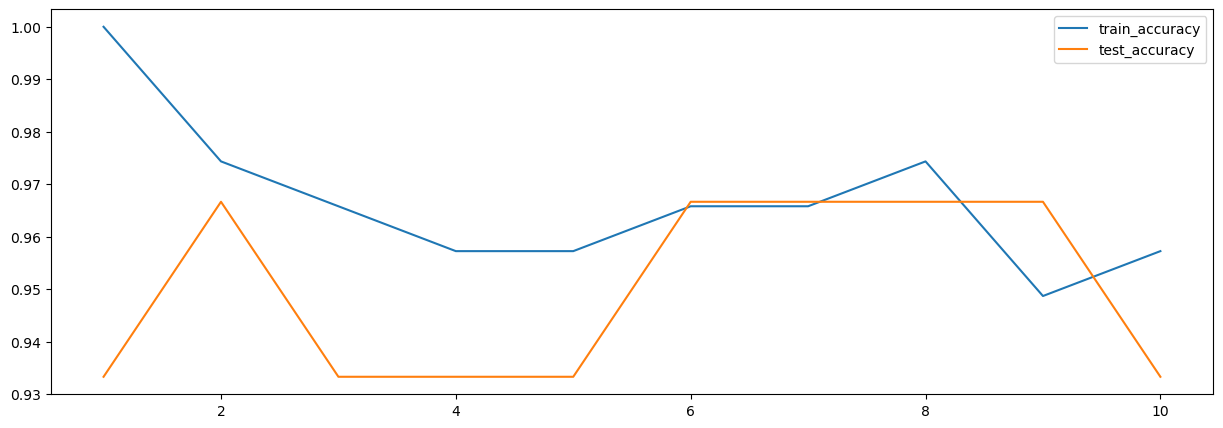

In [33]:
plt.figure(figsize = (15,5))

sns.lineplot(x = neighbors, y = train_accuracy, label = 'train_accuracy')
sns.lineplot(x = neighbors, y = test_accuracy, label = 'test_accuracy')

plt.show()

    lets take for example k = 6, we'll se if this value is optimal later on in the optimisation chapter

### Testing the model with k = 6

In [34]:
knn = KNeighborsClassifier(n_neighbors=6)

In [35]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=6)

In [36]:
knn_pred = knn.predict(X_test)

In [37]:
print('The score of the model KNN with K = 6 is : ', round(knn.score(X_test, Y_test), 4))

The score of the model KNN with K = 6 is :  0.9667


### Confusion matrix 

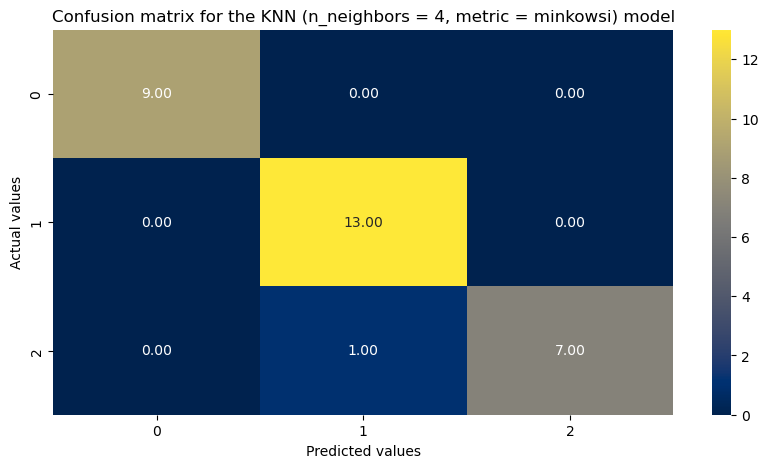

In [38]:
plt.figure(figsize = (10,5))

sns.heatmap(confusion_matrix(Y_test, knn_pred), annot = True, fmt = '.2f', cmap = palettes[8])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

plt.title('Confusion matrix for the KNN (n_neighbors = 4, metric = minkowsi) model')
plt.show()

### Classification report

In [39]:
print(classification_report(Y_test, knn_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.93      1.00      0.96        13
           2       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.98      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



### ROC Curve

In multi-class classification, the ROC (Receiver Operating Characteristic) curve can be adapted using the "one-vs-all" or "one-vs-rest" strategy. This involves treating each class as the positive class and the rest as the negative class, then computing the ROC curve for each class separately.

Here's how you can introduce the ROC curve for multi-class classification:

1. **Compute ROC Curves for Each Class**:
   For each class in the multi-class problem, compute the ROC curve by treating it as the positive class and the rest as the negative class. This will give you multiple sets of False Positive Rates (FPR) and True Positive Rates (TPR).

2. **Plot ROC Curves**:
   Plot the ROC curves for each class on the same graph. Each curve represents the performance of the classifier for a particular class. You can use different colors or markers to distinguish between the curves.

3. **Calculate AUC (Area Under the Curve)**:
   Calculate the Area Under the ROC Curve (AUC) for each class. This provides a single metric to compare the performance of the classifier across different classes.

4. **Interpretation**:
   Analyze the ROC curves and AUC values to understand how well the classifier performs for each class. A higher AUC indicates better classification performance.

In [40]:
from sklearn.preprocessing import label_binarize

# Binarize the output
Y_test_bin = label_binarize(Y_test, classes=[0, 1, 2])

In [41]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
num_classes = Y_test_bin.shape[1]
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test_bin[:, i], knn_pred)
    roc_auc[i] = auc(fpr[i], tpr[i])


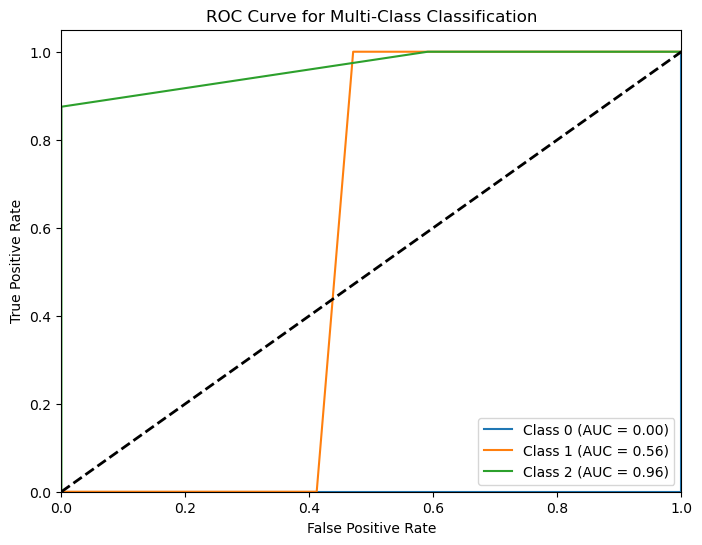

In [42]:
# Plot ROC curves
plt.figure(figsize=(8, 6))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Plot the diagonal line for reference
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend(loc="lower right")
plt.show()


### Cross validation for optimisation

The value of k (which is 6) we selected above was chosen by observing the precision curve with respect to the number of neighbors. This is a primitive method of hyperparameter optimization.

There's a better way to do this, which involves:

1) Trying different hyperparameter values.

2) Fitting them all separately.

3) Checking the performance of each.

4) Choosing the one that performs the best.

5) Using cross-validation each time.

Scikit-learn provides a simple method to accomplish this using GridSearchCV, which is grid search with cross-validation.

In [43]:
param_grid = {
    'n_neighbors': np.arange(1, 21),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}


In [44]:
knn = KNeighborsClassifier()

X_np = X.values

Y_np = Y.to_numpy()

knn_cv = GridSearchCV(knn, param_grid, cv=10)
knn_cv.fit(X_np,Y_np)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'p': [1, 2], 'weights': ['uniform', 'distance']})

This code utilizes the `KNeighborsClassifier` class from Scikit-learn to create a KNN (k-nearest neighbors) classifier. Then, it uses `GridSearchCV` to perform a grid search of hyperparameters to find the best parameters for the KNN classifier.

Here's a step-by-step explanation:

1) `KNeighborsClassifier()`: Creates an instance of the KNN classifier.

2) `param_grid`: This is a dictionary or a list of dictionaries containing the values to test for each hyperparameter of the KNN classifier.

3) `cv=10`: Indicates that 10-fold cross-validation will be used to evaluate the performance of each combination of hyperparameters.

4) `knn_cv.fit(X,Y)`: Applies grid search with cross-validation on the training data `X` and target labels `Y`. This method fits the KNN model for each combination of hyperparameters and evaluates its performance using cross-validation.

Once `fit()` is completed, `knn_cv` contains the fitted model with the best hyperparameters found by the grid search.

In [45]:
knn_cv.best_score_

0.9800000000000001

In [46]:
knn_cv.best_params_

{'algorithm': 'auto',
 'metric': 'euclidean',
 'n_neighbors': 13,
 'p': 1,
 'weights': 'distance'}

### Final KNN Module

In [49]:
knn = KNeighborsClassifier(n_neighbors=13, metric='euclidean', p = 1 , weights='distance', algorithm='auto')

In [50]:
knn.fit(X_train, Y_train)
knn_predict = knn.predict(X_test)

In [51]:
Y_pred_prob = knn.predict_proba(X_test)[:,1]

In [53]:
print(classification_report(Y_test, knn_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.93      1.00      0.96        13
           2       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.98      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



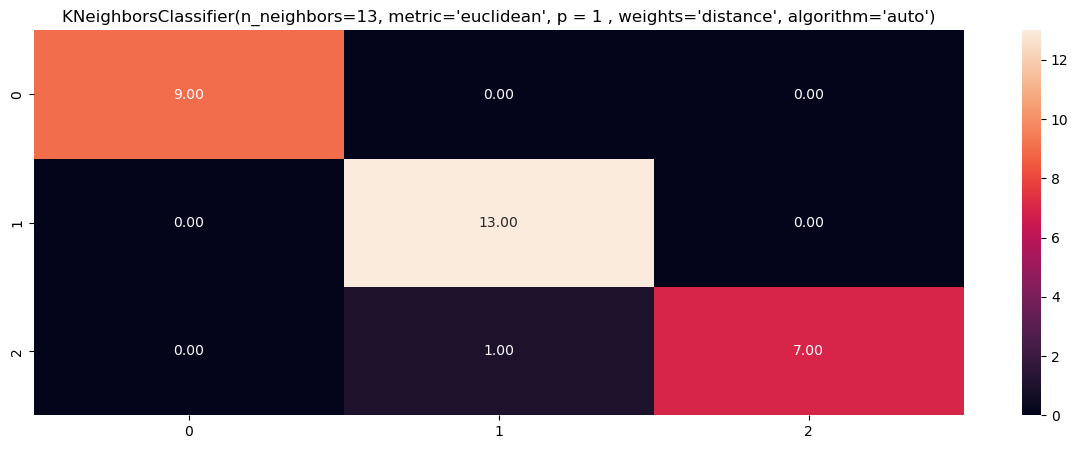

In [58]:
plt.figure(figsize = (15,5))
sns.heatmap(confusion_matrix(Y_test,knn_pred), annot = True, fmt = '.2f')
plt.title("KNeighborsClassifier(n_neighbors=13, metric='euclidean', p = 1 , weights='distance', algorithm='auto')")
plt.show()

## Testing the module

In [65]:
# X.reset_index(drop = True, inplace = True)

In [69]:
iris.sample()

,sepal_length,sepal_width,petal_length,petal_width,species,species_encoded
140,6.7,3.1,5.6,2.4,Iris-virginica,2


In [71]:
# lets make a new entry similar to this one

new_flower_1 = [[6.5, 3.3, 5.7, 2.2]]

# Predict the class of the new flower
predicted_class_1 = knn.predict(new_flower_1)

print("Predicted class for the second flower:", predicted_class_1)

Predicted class for the second flower: [2]


    We can see that the module has managed to properly classify the new flower into the appropriate class. Therefore, our model stand correctly 

# Conclusion

Here's is a quick recap of what we established in this project:

1. **Loading Libraries:** We began by importing necessary libraries like pandas, numpy, matplotlib, seaborn, scikit-learn, etc., to work with data and machine learning algorithms.

2. **Loading and Preprocessing Data:** We loaded the Iris dataset using pandas or scikit-learn. We then preprocessed the data by checking for missing values, encoding categorical variables (if any), and scaling features if required.

3. **Exploratory Data Analysis (EDA):** We visualized the dataset using various techniques like scatter plots, pair plots, histograms, etc., to understand the distributions, relationships, and potential patterns in the data.

4. **Building and Optimizing the Model:** We chose a suitable machine learning algorithm (e.g., K-Nearest Neighbors, Decision Trees, etc.) based on the problem and data characteristics. We then optimized the model by tuning hyperparameters using techniques like GridSearchCV or RandomizedSearchCV to improve performance.

5. **Training the Model:** We split the data into training and testing sets using train_test_split from scikit-learn. We then fit the model on the training data to learn patterns and relationships.

6. **Evaluating Model Performance:** We evaluated the model's performance using various metrics like accuracy, precision, recall, F1-score, ROC-AUC, etc., depending on the problem type (classification or regression).

7. **Visualizing Model Results:** We visualized model results using confusion matrices, ROC curves, precision-recall curves, etc., to gain insights into the model's performance and make informed decisions.

8. **Optimizing and Iterating:** We iterated on the model by refining preprocessing steps, feature engineering, or trying different algorithms to improve performance further.

9. **Testing the Module:** We tested the final module by making predictions on unseen data (e.g., the test set) and evaluating its performance using appropriate metrics. We ensured that the module behaves as expected and meets the desired performance criteria.

10. **Documentation and Reporting:** We documented the entire process, including data preprocessing steps, model selection, hyperparameter tuning, evaluation metrics, and final results. We prepared a detailed report or presentation summarizing the findings, insights, and recommendations.
